In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

from sklearn import metrics

In [2]:
data = pd.read_csv('train.csv', index_col = 0)
data.head(4)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


In [3]:
data.shape

(891, 11)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [5]:
data.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [6]:
data.drop('Cabin', axis = 1, inplace = True)
data.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S


In [7]:
cat_data = data.select_dtypes('object')
cat_data.head(3)

,Name,Sex,Ticket,Embarked
PassengerId,,,,
1,"Braund, Mr. Owen Harris",male,A/5 21171,S
2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C
3,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,S


In [8]:
cat_data.nunique()

Name        891
Sex           2
Ticket      681
Embarked      3
dtype: int64

In [9]:
data.drop(['Name', 'Ticket'], axis = 1, inplace = True)
data.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S


In [10]:
data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [11]:
data['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

<AxesSubplot:xlabel='Age', ylabel='Count'>

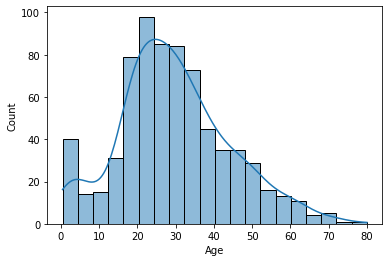

In [12]:
sns.histplot(data['Age'], kde = True)

In [13]:
num_imputer = SimpleImputer(strategy = 'median')

cat_imputer = SimpleImputer(strategy = 'most_frequent')

In [14]:
cat_encoder = LabelEncoder()

In [15]:
X = data.drop('Survived', axis = 1)
y = data.Survived

X.head(3)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
1,3,male,22.0,1,0,7.2500,S
2,1,female,38.0,1,0,71.2833,C
3,3,female,26.0,0,0,7.9250,S


In [16]:
num_features = [col for col in X.columns if X[col].dtype != 'object']
num_features

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [17]:
cat_features = [col for col in X.columns if X[col].dtype == 'object'] 
cat_features

['Sex', 'Embarked']

In [18]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.27, random_state = 11)

In [19]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
811,3,male,26.0,0,0,7.8875,S
687,3,male,14.0,4,1,39.6875,S
534,3,female,NaN,0,2,22.3583,C
279,3,male,7.0,4,1,29.1250,Q
172,3,male,4.0,4,1,29.1250,Q


In [20]:
train_index = X_train.index
train_index

Int64Index([811, 687, 534, 279, 172,  34, 420, 222, 298, 375,
            ...
            793, 851, 584, 674, 333, 270, 338,  92,  81, 704],
           dtype='int64', name='PassengerId', length=650)

In [21]:
valid_index = X_valid.index
valid_index

Int64Index([432, 822, 630, 627, 666, 583, 251, 781, 729, 260,
            ...
              3, 590, 756, 866, 742, 685, 129, 875, 509, 852],
           dtype='int64', name='PassengerId', length=241)

In [22]:
imp_num_t = pd.DataFrame(num_imputer.fit_transform(X_train[num_features]))
imp_num_v = pd.DataFrame(num_imputer.transform(X_valid[num_features]))

imp_num_t.columns = X_train[num_features].columns
imp_num_v.columns = X_valid[num_features].columns


imp_num_t.head()

,Pclass,Age,SibSp,Parch,Fare
0,3.0,26.0,0.0,0.0,7.8875
1,3.0,14.0,4.0,1.0,39.6875
2,3.0,28.0,0.0,2.0,22.3583
3,3.0,7.0,4.0,1.0,29.1250
4,3.0,4.0,4.0,1.0,29.1250


In [23]:
imp_cat_t = pd.DataFrame(cat_imputer.fit_transform(X_train[cat_features]))
imp_cat_v = pd.DataFrame(cat_imputer.transform(X_valid[cat_features]))

imp_cat_t.columns = X_train[cat_features].columns
imp_cat_v.columns = X_valid[cat_features].columns

imp_cat_t.head(10)

,Sex,Embarked
0,male,S
1,male,S
2,female,C
3,male,Q
4,male,Q
5,male,S
6,female,S
7,male,S
8,female,S
9,female,S


In [24]:
imp_cat_v.head(3)

,Sex,Embarked
0,female,S
1,male,S
2,male,Q


In [25]:
enc_cat_t = imp_cat_t.copy()
enc_cat_v = imp_cat_v.copy()

In [26]:
for col in cat_features:
    enc_cat_t[col] = cat_encoder.fit_transform(imp_cat_t[col])
    enc_cat_v[col] = cat_encoder.transform(imp_cat_v[col])


enc_cat_t.head(3)

,Sex,Embarked
0,1,2
1,1,2
2,0,0


In [27]:
X_train, X_valid = imp_num_t.join(enc_cat_t), imp_num_v.join(enc_cat_v)

X_train.head(10)

,Pclass,Age,SibSp,Parch,Fare,Sex,Embarked
0,3.0,26.0,0.0,0.0,7.8875,1,2
1,3.0,14.0,4.0,1.0,39.6875,1,2
2,3.0,28.0,0.0,2.0,22.3583,0,0
3,3.0,7.0,4.0,1.0,29.1250,1,1
4,3.0,4.0,4.0,1.0,29.1250,1,1
5,2.0,66.0,0.0,0.0,10.5000,1,2
6,3.0,10.0,0.0,2.0,24.1500,0,2
7,2.0,27.0,0.0,0.0,13.0000,1,2
8,1.0,2.0,1.0,2.0,151.5500,0,2
9,3.0,3.0,3.0,1.0,21.0750,0,2


## Without scaling

In [28]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [29]:
pred_knn = knn.predict(X_valid)

score = metrics.accuracy_score(pred_knn, y_valid)
score

0.6970954356846473

In [30]:
svc = SVC()
svc.fit(X_train, y_train)

SVC()

In [31]:
pred_svc = svc.predict(X_valid)

score = metrics.accuracy_score(pred_svc, y_valid)
score

0.7136929460580913

## With Scaling

In [32]:
features = X_train.columns
features

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex', 'Embarked'], dtype='object')

### Scaling

In [33]:
scaler = StandardScaler()

In [34]:
scaled_t = pd.DataFrame(scaler.fit_transform(X_train))
scaled_t.columns = X_train.columns

scaled_t.head()

,Pclass,Age,SibSp,Parch,Fare,Sex,Embarked
0,0.831649,-0.224955,-0.474043,-0.490385,-0.510095,0.747498,0.590448
1,0.831649,-1.140265,3.037390,0.784615,0.135661,0.747498,0.590448
2,0.831649,-0.072403,-0.474043,2.059616,-0.216239,-1.337797,-1.934495
3,0.831649,-1.674197,3.037390,0.784615,-0.078829,0.747498,-0.672023
4,0.831649,-1.903024,3.037390,0.784615,-0.078829,0.747498,-0.672023


In [35]:
scaled_v = pd.DataFrame(scaler.transform(X_valid))
scaled_v.columns = X_valid.columns

In [36]:
knn_2 = KNeighborsClassifier()
knn_2.fit(scaled_t, y_train)

KNeighborsClassifier()

In [37]:
preds_2 = knn_2.predict(scaled_v)
score = metrics.accuracy_score(preds_2, y_valid)
score

0.8506224066390041

In [38]:
svc_2 = SVC()
svc_2.fit(scaled_t, y_train)

SVC()

In [39]:
preds_svc_2 = svc_2.predict(scaled_v)
score = metrics.accuracy_score(preds_svc_2, y_valid)
score

0.8589211618257261